In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def malaria_severity_prediction(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error loading image. Please check the file path.")
    
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for **purple-infected** regions
    lower_purple = np.array([120, 50, 50])  # Adjusted lower range for purple
    upper_purple = np.array([160, 255, 255])  # Adjusted upper range for purple

    # Create mask for infected regions
    mask = cv2.inRange(hsv_image, lower_purple, upper_purple)

    # Calculate the infection percentage
    total_pixels = mask.size
    infected_pixels = np.count_nonzero(mask)
    infection_percentage = (infected_pixels / total_pixels) * 100

    # Determine severity level
    if infection_percentage == 0:
        severity = "No Infection"
    elif infection_percentage <= 5:
        severity = "Mild"
    elif infection_percentage <= 15:
        severity = "Moderate"
    else:
        severity = "Severe"

    # Display the original and masked images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image_rgb)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Masked Image (Infected Regions)")
    ax[1].axis("off")

    plt.show()

    return {"infection_percentage": infection_percentage, "severity": severity}

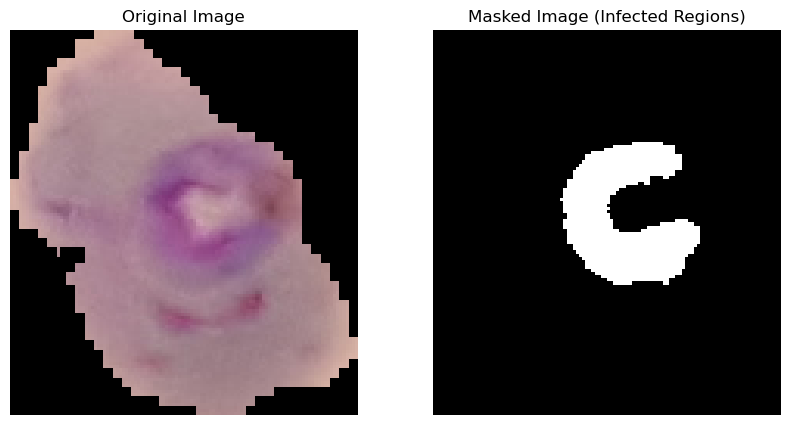

Infection Percentage: 8.89%
Severity Level: Moderate


In [37]:
# Example usage
image_path = "E:/final year project/Dataset/Test/Parasite/4.png"  # Replace with your image path
result = malaria_severity_prediction(image_path)

print(f"Infection Percentage: {result['infection_percentage']:.2f}%")
print(f"Severity Level: {result['severity']}")